In [50]:
from T_UNet_A import t_unet_a
from T_UNet_A_D import t_unet_a_d
from T_UNet_A_D_AS import t_unet_a_d_as
from U_Net import u_net
from U_Net_D import u_net_d
from loss import dice_loss

In [51]:
model_t_unet_a = t_unet_a('adam', (256, 256, 1), dice_loss)
model_t_unet_a.load_weights('../model/model-T_u_a_d-maproad.h5')

In [52]:
model_unet_fc2d = u_net('adam', (256, 256, 1), dice_loss)
model_unet_fc2d.load_weights('../model/model-T_unet-fc2d-maproad.h5')

In [53]:
model_t_unet_a_d = t_unet_a_d('adam', (256, 256, 1), dice_loss)
model_t_unet_a_d.load_weights('../model/model-T_u_a_d-maproad.h5')

In [54]:
model_t_unet_a_d_as = t_unet_a_d_as('adam', (256, 256, 1), dice_loss)
model_t_unet_a_d_as.load_weights('../model/model-T_u-a_d_aspp-maproad.h5')

In [55]:
model_u_net = u_net('adam', (256, 256, 1), dice_loss)
model_u_net.load_weights('../model/model-T_unet-maproad.h5')

In [56]:
model_u_net_d = u_net_d('adam', (256, 256, 1), dice_loss)
model_u_net_d.load_weights('../model/model-T_unet_d-maproad.h5')

In [57]:
model_t_unet_a_d_as_fc2d = t_unet_a_d_as('adam', (256, 256, 1), dice_loss)
model_t_unet_a_d_as_fc2d.load_weights('../model/model_T-u-a_d_aspp-fc2d-maproad.h5')

In [67]:
models_with_names = {'U-Net': model_u_net, 'U-Net-FC2D': model_unet_fc2d, 'U-Net-D': model_u_net_d, 'T-UNet-A': model_t_unet_a,
                     'T-UNet-A-D': model_t_unet_a_d, 'T-UNet-A-D-AS': model_t_unet_a_d_as, 'T-UNet-A-D-AS-FC2D': model_t_unet_a_d_as_fc2d}

In [68]:
from single_prediction import predict_image_and_plot, predict_image

In [69]:
image_path = '../training_dataset/tianditu/test/custom/photo_2023-04-12_15-45-12.jpg'

1/1 [==============================] - 0s 19ms/step


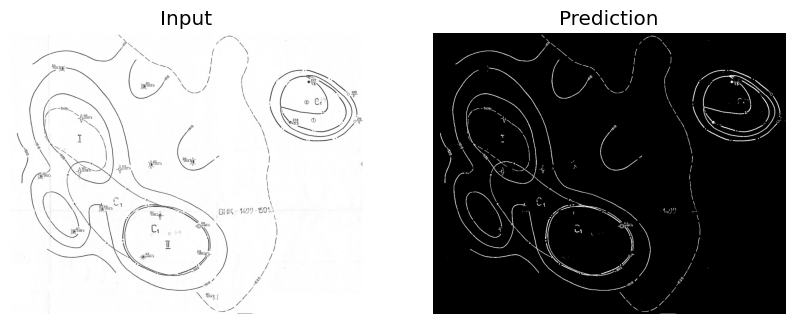

In [70]:
predict_image_and_plot(image_path, model_t_unet_a)

1/1 [==============================] - 0s 292ms/step


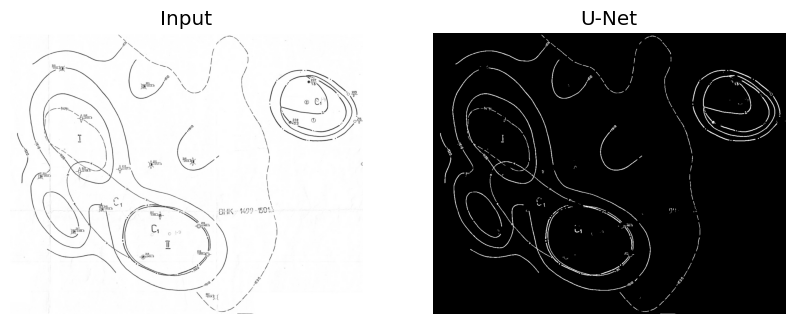

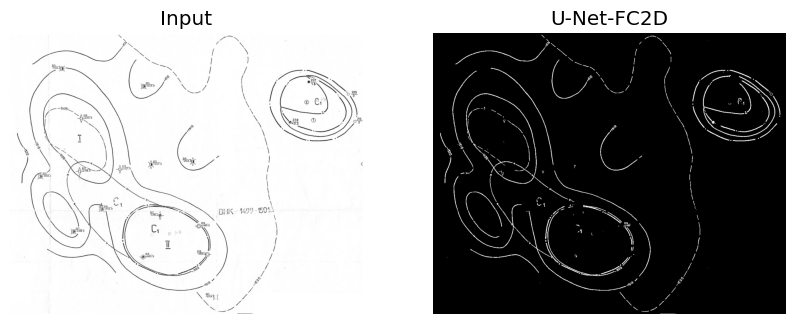

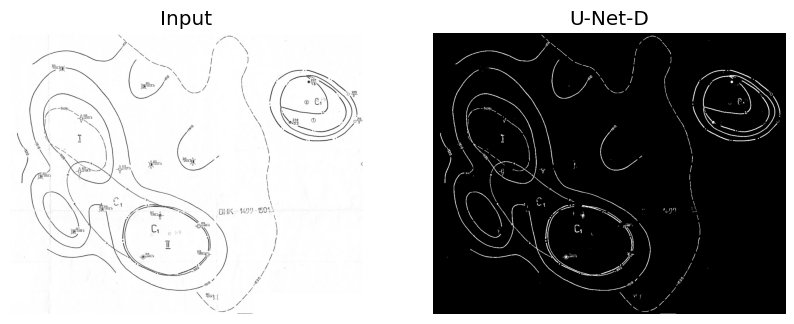

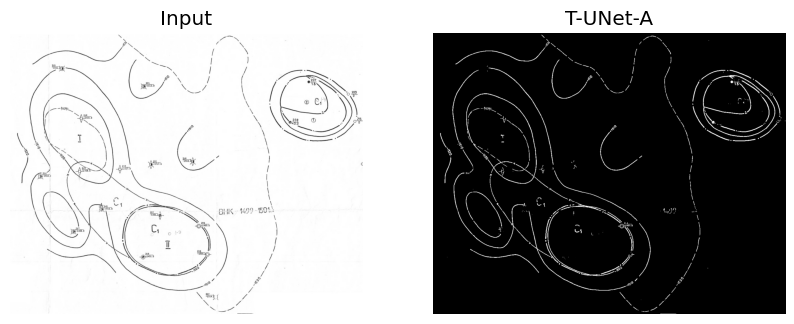

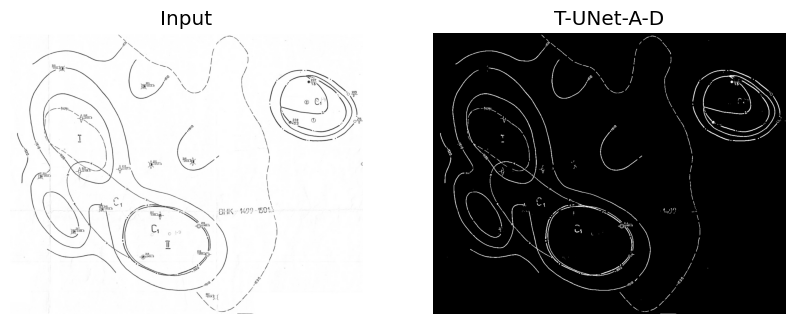

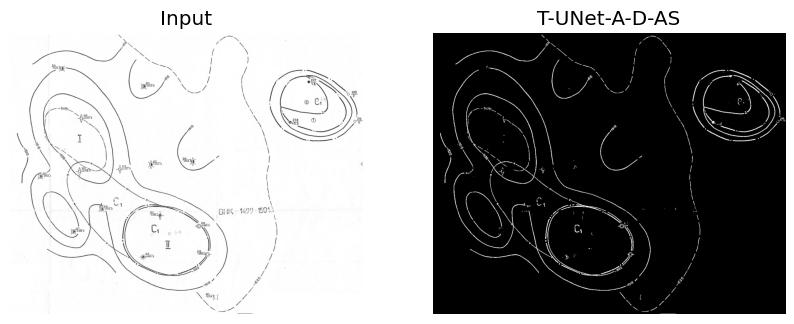

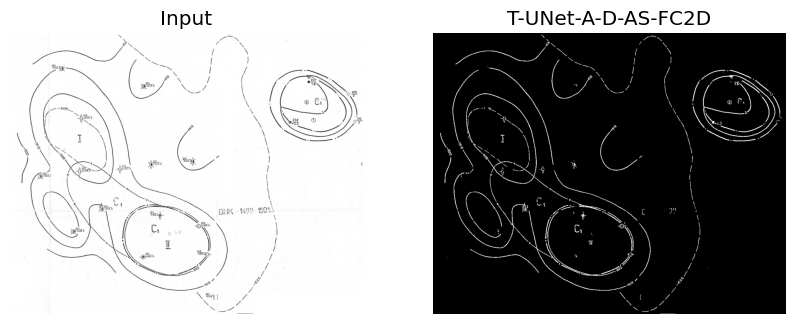

In [71]:
for name, model in models_with_names.items():
    predict_image_and_plot(image_path, model, name)

1/1 [==============================] - 0s 16ms/step


(-0.5, 1279.5, 1019.5, -0.5)

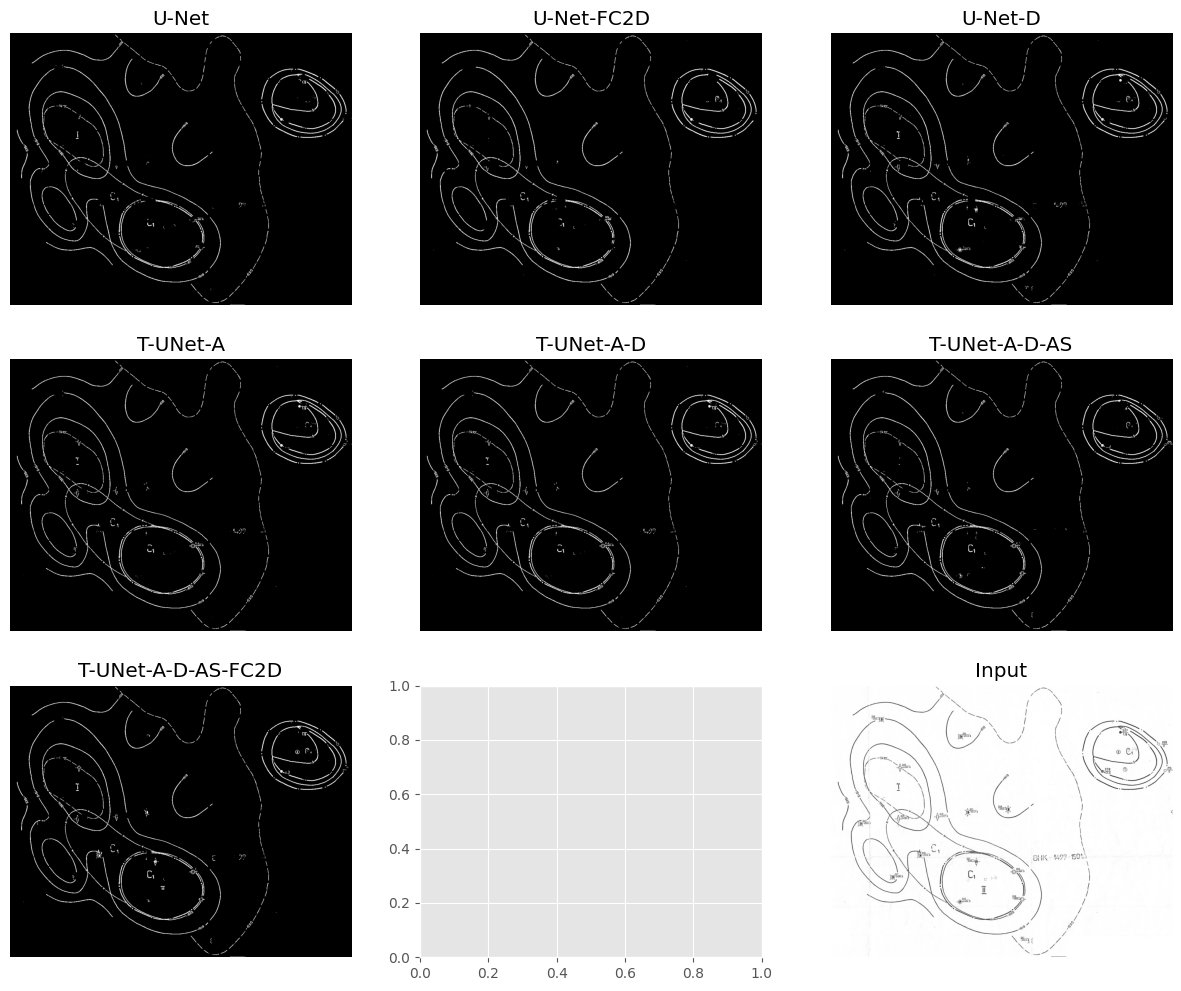

In [76]:
import matplotlib.pyplot as plt
import numpy as np

num_models = len(models_with_names) + 1
columns = min(num_models, 3)
rows = (num_models + 2) // 3
image_path = '../training_dataset/tianditu/test/custom/photo_2023-04-12_15-45-12.jpg'

fig, axs = plt.subplots(rows, columns, figsize=(5 * columns, 4 * rows))
for i, (name, model) in enumerate(models_with_names.items()):
    pred_img = predict_image(image_path, model)
    axs[i // columns, i % columns].imshow(pred_img.astype(np.uint8))
    axs[i // columns, i % columns].set_title(name)
    axs[i // columns, i % columns].axis('off')

axs[rows - 1, columns - 1].imshow(plt.imread(image_path))
axs[rows - 1, columns - 1].set_title('Input')
axs[rows - 1, columns - 1].axis('off')

In [77]:
# Evaluate the models

from dataloader import get_data

In [78]:
test_images, test_masks = get_data('../training_dataset/tianditu/test/', train=True)

Getting and resizing images ... 


  0%|          | 0/40 [00:00<?, ?it/s]

Done!


In [79]:
for name, model in models_with_names.items():
    print(f'Evaluating {name}')
    model.evaluate(test_images, test_masks)

Evaluating U-Net
2/2 [==============================] - 0s 52ms/step - loss: 0.0537 - dsc: 0.9495 - tp: 0.9557 - tn: 0.9983 - prec: 0.9390 - recall: 0.9603
Evaluating U-Net-FC2D
2/2 [==============================] - 0s 24ms/step - loss: 0.0644 - dsc: 0.9384 - tp: 0.9449 - tn: 0.9977 - prec: 0.9286 - recall: 0.9484
Evaluating U-Net-D
2/2 [==============================] - 0s 27ms/step - loss: 0.0628 - dsc: 0.9399 - tp: 0.9599 - tn: 0.9970 - prec: 0.9434 - recall: 0.9365
Evaluating T-UNet-A
2/2 [==============================] - 0s 15ms/step - loss: 0.0687 - dsc: 0.9336 - tp: 0.9446 - tn: 0.9974 - prec: 0.9264 - recall: 0.9411
Evaluating T-UNet-A-D
2/2 [==============================] - 0s 16ms/step - loss: 0.0687 - dsc: 0.9336 - tp: 0.9446 - tn: 0.9974 - prec: 0.9264 - recall: 0.9411
Evaluating T-UNet-A-D-AS
2/2 [==============================] - 0s 16ms/step - loss: 0.0689 - dsc: 0.9333 - tp: 0.9529 - tn: 0.9968 - prec: 0.9357 - recall: 0.9312
Evaluating T-UNet-A-D-AS-FC2D
2/2 [======